In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
import plotly.express as px
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

print("Dataset analysis fake news")
print("Link - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset")

Dataset analysis fake news
Link - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


Management decision problem - Take corrective action in  order to curtail the impact of fake news.

Analytics Research Problem - Identify the targets of fake news and report to management so that they
can narrow down the scope .

Research Objective
  1. Pre-process data.  2. Identify named entity about which fake news is spread.  3. Visualise

In [3]:
df_fake_news = pd.read_csv(r"E:/MyDrive-Phd/DataScience/Kaggle/fake_and_real_news/Fake.csv")
tokenizer = TweetTokenizer()
tweet_tokens =[]

#tokenize, remove stopwords, non-alphabetic words, lowercase
def preprocess(textstring):
   stops =  set(stopwords.words('english'))
   tokens = tokenizer.tokenize(textstring)
   return [token.lower() for token in tokens if token.isalpha()
          and token not in stops]



for text in df_fake_news['text'].values:
    temp=preprocess(text)
   ## print(temp)
    tweet_tokens.extend(temp)

##print(tweet_tokens)

The tokens visualisation using word-cloud . This will give a glimpse into the
target of fake news be it nouns or verbs used in tweets

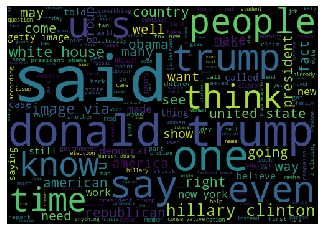

In [7]:
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(tweet_tokens)
tweet_word_cloud = WordCloud(width=500,height=350).generate(unique_string)
plt.imshow(tweet_word_cloud)
plt.axis("off")
plt.show()

As evident from wordcloud both entities and verbs/topics are being seen here.
Pull  out the entities being target of fake news conversation

In [5]:
import spacy
nlp = spacy.load("en_core_web_lg")
nlp.max_length = 39167694
tweet_tokens_dup_removed = list(set(tweet_tokens))
##split the list into 10 lists
split_list = np.array_split(tweet_tokens_dup_removed,10)
namedEnt = []
for i in range(0,9) :
    tmpList = split_list[i]
    tmpList_str = " ".join(tmpList)
    doc = nlp(tmpList_str)
    for ent in doc.ents :
       namedEnt.extend(ent)

print(namedEnt)

[winslet, mummy, noirei, bye, zealand, neustadt, panicker, everitt, gtfoh, motorola, showtime, boothe, meneed, treasurey, jalonick, cubicle, throughmovies, carrasquillo, popovich, beatriz, bmv, michaela, glob, parrywhat, jared, ammari, deedeemendoza, zehlif, lymphangietic, gotham, balsa, lauran, keurig, bergeron, taqiyah, jautz, fiction, analytica, dusk, bamberger, l, heller, fellowship, wwpgear, village, slutbags, cmerry, bish, mindwar, arlon, poles, liddle, sodahead, golsteyn, freddy, hedgelate, mcflightsuit, vmas, perceptibility, blm, regina, noonan, mercury, elgrichi, marksbury, zwillich, nitti, tanveer, lynnanne, hansen, twitternice, saidhe, impala, persad, northwestern, jeromy, crayon, indeedhouse, harlow, tigar, lytle, elderkin, smagula, luni, pvv, traditionalism, rung, domiguez, kegley, naftali, joker, boogyman, crusades, coon, haitian, sotomayer, blair, ws, cabezas, charlottetown, swane, unincriminating, germain, nder, mikkelsons, camp, subledger, dnainfo, studies, zipppers, p

Analysis Summary - As evident from word cloud target of fake news conversation is Donald Trump highlighted.
The campaign managers for Trump can use this analyis to further monitor and take strategic decisions to
turn public sentiment towards Trump positively.

Summarization of the conversations about Trump

In [10]:
df_trump = df_fake_news[df_fake_news['text'].str.contains("trump")]
trump_list = df_trump["text"].tolist()
##create text corpus only of tweets mentioning trump
trump_txt = " ".join(trump_list)

## summarise tweets
from gensim.summarization import summarize
print(summarize(trump_txt))

https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF.
However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an internal server error: https://t.co/zrWpyMXRcz pic.twitter.com/wiQSQNNzw0  Christopher Ingraham (@_cingraham) December 28, 2017That snippet of code appears to be on all https://t.co/dkhw0AlHB4 pages, which the footer says is paid for by the RNC?
Still not clear when these messages would actually display, since the actual 404 (and presumably 500) page displays a different message pic.twitter.com/Z7dmyQ5smy  Christopher Ingraham (@_cingraham) December 29, 2017That suggests someone at either RNC or the Trump admin is sensitive enough to Trump s golf problem to make this iss